# Chapter 9: Comparisons, Masks, and Boolean Logic

Masking comes up when you want to extract, modify, count, or otherwise manipulate values ina n array based on some criterion: for example, <br>

1. count all values greater than a ceratin value
2. remove all outliers that are above some threshold

## Example: Counting Rainy Days

In [2]:
# Rainfall Stats, load the dataset

import numpy as np
from vega_datasets import data

# Use DataFrame operations to extract fainfall as NumPy array
rainfall_mm = np.array(data.seattle_weather().set_index('date')['precipitation']['2015'])
len(rainfall_mm)

365

/var/folders/9l/vy9cjvrs5qn5_8x2fs6ktq5m0000gn/T/ipykernel_79093/1501583821.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


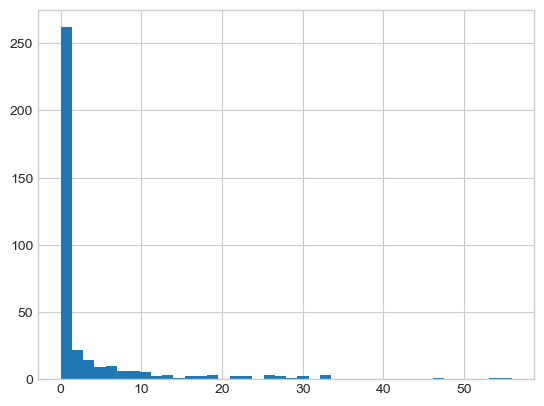

In [4]:
# histogram of rainy days

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.hist(rainfall_mm, 40);

We can see that despite Seattles reputaion most days saw near zero rainfall in 2015

We saw in Chapter 6 that NumPy's ufuncs can be used in place of loops to do fast element-wise arithmetic operations on arrays; in the same way, we can use other ufuncs to do element-wise *comparisons* over arrays, adn we can then manipulate teh results to answer the questions we have.

## Comparison Operators as Ufuncs
comparison - think <, > <br>
We saw element wise operators like +, -, *, /
<br>
The result of the comparison operators is always an array with a Boolean data type 

In [5]:
# Examples

x = np.array([1, 2, 3, 4, 5])

x < 3

array([ True,  True, False, False, False])

In [6]:
x > 3

array([False, False, False,  True,  True])

In [7]:
x <= 3

array([ True,  True,  True, False, False])

In [8]:
x >= 3

array([False, False,  True,  True,  True])

In [9]:
x != 3

array([ True,  True, False,  True,  True])

In [11]:
x == 3

array([False, False,  True, False, False])

In [12]:
# Element-wise comparision of two arrays with compound experessions

(2 * x) == (x ** 2)

array([False,  True, False, False, False])

#### Equivalent Numpy operators


|Operator   | Equivalent ufunc|
|:---------:|:----------------|
| ==        | np.equal        |
| <         | np.less         |
| >         | np.greater      |
| <=        | np.less_equal   |
| >=        | np.greater_equal|
| !=        | np.not_equal    |

In [15]:
# Two dimensional Example

rng = np.random.default_rng(seed=1701)
x = rng.integers(10, size=(3,4))
x

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]])

## Working with Boolean Arrays

### Counting Entries

In [16]:
# How many values less than 6?

np.count_nonzero(x < 6)

8

In [17]:
# False -> 0, True -> 1

np.sum(x < 6)

8

In [18]:
# np.sum can be used on rows or columns
# How many values less than 6 in each row
# 3 in the first row
# 2 in the second
# 3 in the third

np.sum(x < 6, axis=1)

array([3, 2, 3])

In [19]:
# Check if any or all values are true

np.any(x > 8)

True

In [20]:
np.any(x < 0)

False

In [21]:
np.all(x < 10)

True

In [23]:
# Are all values equal to 6?

np.all(x == 6)

False

In [24]:
# Are all values in each row less than 8?

np.all(x < 8, axis=1)

array([False, False,  True])

**Note** Python's built in sum, any, and all functions are different and will produce unintended results on multidimensional arrays

### Boolean Operators

In [25]:
np.sum((rainfall_mm > 10) & (rainfall_mm < 20))

16